# **Exercise 7.03**
# **Building a Convolutional Neural Network**

With our next exercise, we will be building a convolutional base layer.  Here we will utilize everything that we’ve learned up to this point. We will be working with a more advanced datset than one like MNIST. In this dataset our images aren’t centered. They target is seen at all angles and at different positions in the frame. This is the Humans vs Horses dataset. We will continue to build on this foundation throughout the chapter, adding to it piece by piece. 
Our main goal for this exercise is to creat a convolutional base layer for our model. 



**Import libraries.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing import image

**Lets get the training dataset.**

In [2]:
(our_train_dataset, our_test_dataset), \
dataset_info = tfds.load('horses_or_humans', \
                         split = ['train', 'test'],\
                         data_dir = 'content/',\
                         shuffle_files = True,\
                         with_info = True)
assert isinstance(our_train_dataset, tf.data.Dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to content/horses_or_humans/3.0.0.incompleteWOOK2W/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to content/horses_or_humans/3.0.0.incompleteWOOK2W/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to content/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


**Check our class folders**

In [4]:
image_shape = dataset_info.features["image"].shape
print(f'Shape of Images in the Dataset: \t{image_shape}')
print(f'Number of Classes in the Dataset: \
      \t{dataset_info.features["label"].num_classes}')

names_of_classes = dataset_info.features["label"].names

for name in names_of_classes:
    print(f'Label for class "{name}": \
          \t\t{dataset_info.features["label"].str2int(name)}')


Shape of Images in the Dataset: 	(300, 300, 3)
Number of Classes in the Dataset:       	2
Label for class "horses":           		0
Label for class "humans":           		1


In [5]:
print(f'Total examples in Train Dataset: \
      \t{len(our_train_dataset)}')
pos_tr_samples = sum(i['label'] for i in our_train_dataset)
print(f'Horses in Train Dataset: \t\t{len(our_train_dataset) \
                                      - pos_tr_samples}')
print(f'Humans in Train Dataset: \t\t{pos_tr_samples}')

print(f'\nTotal examples in Test Dataset: \
      \t{len(our_test_dataset)}')
pos_ts_samples = sum(i['label'] for i in our_test_dataset)
print(f'Horses in Test Dataset: \t\t{len(our_test_dataset) \
                                     - pos_ts_samples}')
print(f'Humans in Test Dataset: \t\t{pos_ts_samples}')


Total examples in Train Dataset:       	1027
Horses in Train Dataset: 		500
Humans in Train Dataset: 		527

Total examples in Test Dataset:       	256
Horses in Test Dataset: 		128
Humans in Test Dataset: 		128


**Let's look at the actual images.**

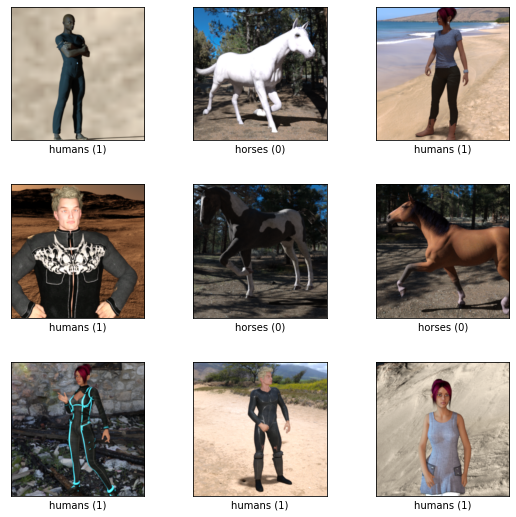

In [6]:
fig = tfds.show_examples(our_train_dataset, dataset_info)

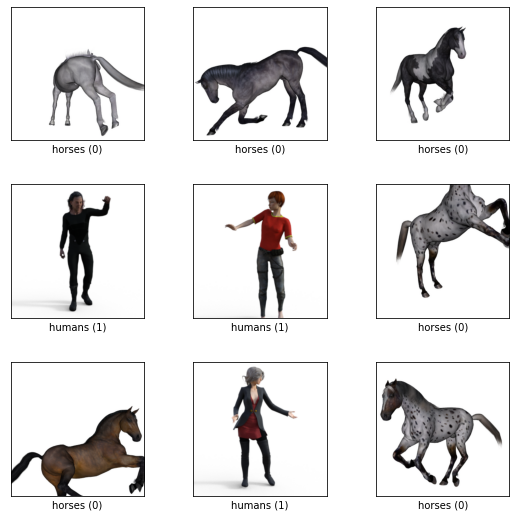

In [7]:
fig = tfds.show_examples(our_test_dataset, dataset_info)

**Create our model.**

In [8]:
our_cnn_model = models.Sequential([
    layers.Conv2D(filters = 16, kernel_size = (3,3), \
                  input_shape = image_shape),\
    layers.Activation('relu'),\
    layers.MaxPool2D(pool_size = (2, 2)),\

    layers.Conv2D(filters = 32, kernel_size = (3,3)),\
    layers.Activation('relu'),\
    layers.MaxPool2D(pool_size = (2, 2)),\

    layers.Flatten(),\
    layers.Dense(units = 512),\
    layers.Activation('relu'),\
    layers.Dense(units = 1),\
    layers.Activation('sigmoid')
])


**Compile our model.**

In [10]:
our_cnn_model.compile(optimizer=RMSprop(learning_rate=0.001), \
                      loss='binary_crossentropy',\
                      metrics=['acc'], loss_weights=None,\
                      weighted_metrics=None, run_eagerly=None,\
                      steps_per_execution=None\
)

print(our_cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 activation (Activation)     (None, 298, 298, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 147, 147, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                    